In [1]:
%%time
import malaya

CPU times: user 12.4 s, sys: 1.89 s, total: 14.3 s
Wall time: 19.4 s


## List available deep learning POS models

In [2]:
malaya.pos.available_deep_model()

['concat', 'bahdanau', 'luong', 'entity-network', 'attention']

## Describe supported POS

In [3]:
malaya.describe_pos()

ADJ - Adjective, kata sifat
ADP - Adposition
ADV - Adverb, kata keterangan
ADX - Auxiliary verb, kata kerja tambahan
CCONJ - Coordinating conjuction, kata hubung
DET - Determiner, kata penentu
NOUN - Noun, kata nama
NUM - Number, nombor
PART - Particle
PRON - Pronoun, kata ganti
PROPN - Proper noun, kata ganti nama khas
SCONJ - Subordinating conjunction
SYM - Symbol
VERB - Verb, kata kerja
X - Other


## Load CRF Model

In [4]:
crf = malaya.pos.crf()

In [5]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

In [6]:
crf.predict(string)

[('Kuala', 'PROPN'),
 ('Lumpur', 'PROPN'),
 ('Sempena', 'SCONJ'),
 ('sambutan', 'NOUN'),
 ('Aidilfitri', 'PROPN'),
 ('minggu', 'NOUN'),
 ('depan', 'ADP'),
 ('Perdana', 'PROPN'),
 ('Menteri', 'PROPN'),
 ('Tun', 'PROPN'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('Mohamad', 'PROPN'),
 ('dan', 'CCONJ'),
 ('Menteri', 'PROPN'),
 ('Pengangkutan', 'PROPN'),
 ('Anthony', 'PROPN'),
 ('Loke', 'PROPN'),
 ('Siew', 'PROPN'),
 ('Fook', 'PROPN'),
 ('menitipkan', 'VERB'),
 ('pesanan', 'NOUN'),
 ('khas', 'ADJ'),
 ('kepada', 'ADP'),
 ('orang', 'NOUN'),
 ('ramai', 'ADJ'),
 ('yang', 'PRON'),
 ('mahu', 'ADV'),
 ('pulang', 'VERB'),
 ('ke', 'ADP'),
 ('kampung', 'NOUN'),
 ('halaman', 'NOUN'),
 ('masing-masing', 'NOUN'),
 ('Dalam', 'ADP'),
 ('video', 'NOUN'),
 ('pendek', 'ADJ'),
 ('terbitan', 'NOUN'),
 ('Jabatan', 'PROPN'),
 ('Keselamatan', 'PROPN'),
 ('Jalan', 'PROPN'),
 ('Raya', 'PROPN'),
 ('Jkjr', 'PROPN'),
 ('itu', 'DET'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('menasihati', 'VERB'),
 ('mereka', 'PR

## Print important features CRF model

In [7]:
crf.print_features(10)

Top-10 positive:
16.443463 DET      word:para
15.494273 DET      word:berbagai
14.856205 DET      word:tersebut
14.426293 ADJ      word:menakjubkan
14.319714 ADV      word:memang
14.158206 ADP      word:tentang
13.907366 VERB     word:percaya
13.635634 VERB     word:integrasi
13.630582 ADP      word:dengan
13.562358 ADV      word:menurutnya

Top-10 negative:
-6.663068 PROPN    prefix-2:be
-6.714450 ADV      next_word:menyatakan
-6.862083 PROPN    next_word:Jepang
-7.183600 PROPN    suffix-3:pun
-7.264241 ADV      next_word-suffix-3:nai
-7.676069 VERB     word:memuaskan
-7.961231 ADP      prev_word:pernah
-8.006671 NOUN     suffix-2:ke
-8.135974 ADP      prev_word-prefix-3:pal
-8.173493 PROPN    suffix-3:nya


## Print important transitions CRF model

In [8]:
crf.print_transitions(10)

Top-10 likely transitions:
PROPN  -> PROPN   5.767666
NOUN   -> NOUN    4.291842
DET    -> DET     3.723729
NOUN   -> PROPN   3.035784
CCONJ  -> CCONJ   2.545162
X      -> X       2.476296
ADP    -> NOUN    2.324735
ADJ    -> ADJ     2.285807
NOUN   -> ADJ     2.258407
ADP    -> PROPN   2.181474

Top-10 unlikely transitions:
SCONJ  -> AUX     -3.341014
PART   -> NUM     -3.406289
SCONJ  -> ADJ     -3.447362
SYM    -> ADV     -3.468094
SYM    -> ADJ     -3.597291
AUX    -> NUM     -3.657861
PART   -> PART    -4.059430
X      -> CCONJ   -4.929272
ADP    -> SCONJ   -4.960199
ADP    -> CCONJ   -6.236844


## Load deep learning models

In [9]:
for i in malaya.pos.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.pos.deep_model(i)
    print(model.predict(string))
    print()

Testing concat model
[('Kuala', 'PROPN'), ('Lumpur', 'PROPN'), ('Sempena', 'PROPN'), ('sambutan', 'NOUN'), ('Aidilfitri', 'PROPN'), ('minggu', 'NOUN'), ('depan', 'ADJ'), ('Perdana', 'PROPN'), ('Menteri', 'PROPN'), ('Tun', 'PROPN'), ('Dr', 'PROPN'), ('Mahathir', 'PROPN'), ('Mohamad', 'PROPN'), ('dan', 'CCONJ'), ('Menteri', 'PROPN'), ('Pengangkutan', 'NOUN'), ('Anthony', 'PROPN'), ('Loke', 'NOUN'), ('Siew', 'PROPN'), ('Fook', 'PROPN'), ('menitipkan', 'VERB'), ('pesanan', 'NOUN'), ('khas', 'ADJ'), ('kepada', 'ADP'), ('orang', 'NOUN'), ('ramai', 'ADJ'), ('yang', 'PRON'), ('mahu', 'ADV'), ('pulang', 'VERB'), ('ke', 'NUM'), ('kampung', 'NOUN'), ('halaman', 'NOUN'), ('masing-masing', 'NOUN'), ('Dalam', 'ADP'), ('video', 'NOUN'), ('pendek', 'ADJ'), ('terbitan', 'NOUN'), ('Jabatan', 'NOUN'), ('Keselamatan', 'NOUN'), ('Jalan', 'PROPN'), ('Raya', 'PROPN'), ('Jkjr', 'NOUN'), ('itu', 'DET'), ('Dr', 'PROPN'), ('Mahathir', 'PROPN'), ('menasihati', 'VERB'), ('mereka', 'PRON'), ('supaya', 'SCONJ'), ('b

17.0MB [00:08, 2.08MB/s]                          


downloading frozen /Users/huseinzol/Malaya/pos/bahdanau setting


1.00MB [00:00, 4.35MB/s]                   
  0%|          | 0.00/16.1 [00:00<?, ?MB/s]

[('Kuala', 'PROPN'), ('Lumpur', 'PROPN'), ('Sempena', 'PROPN'), ('sambutan', 'NOUN'), ('Aidilfitri', 'PROPN'), ('minggu', 'NOUN'), ('depan', 'NOUN'), ('Perdana', 'PROPN'), ('Menteri', 'PROPN'), ('Tun', 'PROPN'), ('Dr', 'PROPN'), ('Mahathir', 'PROPN'), ('Mohamad', 'PROPN'), ('dan', 'CCONJ'), ('Menteri', 'PROPN'), ('Pengangkutan', 'NOUN'), ('Anthony', 'PROPN'), ('Loke', 'PROPN'), ('Siew', 'PROPN'), ('Fook', 'PROPN'), ('menitipkan', 'VERB'), ('pesanan', 'NOUN'), ('khas', 'ADJ'), ('kepada', 'ADP'), ('orang', 'NOUN'), ('ramai', 'ADJ'), ('yang', 'PRON'), ('mahu', 'ADV'), ('pulang', 'VERB'), ('ke', 'ADP'), ('kampung', 'NOUN'), ('halaman', 'NOUN'), ('masing-masing', 'PROPN'), ('Dalam', 'ADP'), ('video', 'NOUN'), ('pendek', 'ADJ'), ('terbitan', 'NOUN'), ('Jabatan', 'PROPN'), ('Keselamatan', 'PROPN'), ('Jalan', 'PROPN'), ('Raya', 'PROPN'), ('Jkjr', 'PROPN'), ('itu', 'DET'), ('Dr', 'PROPN'), ('Mahathir', 'PROPN'), ('menasihati', 'NOUN'), ('mereka', 'PRON'), ('supaya', 'SCONJ'), ('berhenti', 'VERB

17.0MB [00:06, 2.44MB/s]                          
  0%|          | 0.00/0.77 [00:00<?, ?MB/s]

downloading frozen /Users/huseinzol/Malaya/pos/luong setting


1.00MB [00:00, 4.17MB/s]                   


[('Kuala', 'PROPN'), ('Lumpur', 'PROPN'), ('Sempena', 'NOUN'), ('sambutan', 'NOUN'), ('Aidilfitri', 'PROPN'), ('minggu', 'NOUN'), ('depan', 'ADJ'), ('Perdana', 'PROPN'), ('Menteri', 'PROPN'), ('Tun', 'PROPN'), ('Dr', 'PROPN'), ('Mahathir', 'PROPN'), ('Mohamad', 'PROPN'), ('dan', 'CCONJ'), ('Menteri', 'PROPN'), ('Pengangkutan', 'NOUN'), ('Anthony', 'PROPN'), ('Loke', 'PROPN'), ('Siew', 'PROPN'), ('Fook', 'PROPN'), ('menitipkan', 'VERB'), ('pesanan', 'NOUN'), ('khas', 'ADJ'), ('kepada', 'ADP'), ('orang', 'NOUN'), ('ramai', 'ADJ'), ('yang', 'PRON'), ('mahu', 'ADV'), ('pulang', 'VERB'), ('ke', 'ADP'), ('kampung', 'NOUN'), ('halaman', 'NOUN'), ('masing-masing', 'NOUN'), ('Dalam', 'ADP'), ('video', 'NOUN'), ('pendek', 'NOUN'), ('terbitan', 'NOUN'), ('Jabatan', 'NOUN'), ('Keselamatan', 'PROPN'), ('Jalan', 'PROPN'), ('Raya', 'PROPN'), ('Jkjr', 'PROPN'), ('itu', 'DET'), ('Dr', 'PROPN'), ('Mahathir', 'PROPN'), ('menasihati', 'VERB'), ('mereka', 'PRON'), ('supaya', 'SCONJ'), ('berhenti', 'VERB'),

## Print important features from deep learning model

In [10]:
bahdanau = malaya.pos.deep_model('bahdanau')
bahdanau.print_features(10)

Top-10 positive:
tahapan: 4.671836
Shanksville: 4.510098
merekamnya: 4.445672
basket: 4.269119
perkuliahan: 4.235321
Juventus: 4.220717
Cigugur: 4.194372
sekutu: 4.154349
dipelihara: 4.075409
dipacu: 4.054930

Top-10 negative:
Kkp: -4.665946
Tryphon: -4.562038
Tidung: -4.405613
Dane: -4.368353
merasakan: -4.307473
Ina: -4.235865
sekelompok: -4.183155
Lionel: -4.140708
Kibo: -4.140357
Quena: -4.000028


## Print important transitions from deep learning model

In [11]:
bahdanau.print_transitions(10)

Top-10 likely transitions:
CCONJ -> SCONJ: 0.761498
NUM -> SYM: 0.649993
ADV -> NUM: 0.587261
SCONJ -> CCONJ: 0.556012
ADP -> NOUN: 0.532615
VERB -> ADP: 0.463013
SYM -> X: 0.460407
ADJ -> ADP: 0.443898
DET -> SCONJ: 0.406774
PAD -> SYM: 0.394821

Top-10 unlikely transitions:
PRON -> SCONJ: -0.733985
DET -> X: -0.727224
SYM -> ADJ: -0.684060
X -> SCONJ: -0.642626
PART -> PART: -0.641473
ADJ -> SYM: -0.636572
SYM -> ADV: -0.634957
ADP -> X: -0.620329
PART -> DET: -0.597990
DET -> NUM: -0.563087


## Visualize output alignment from attention

This visualization only can call from `bahdanau` or `luong` model.

In [12]:
d_object, predicted, state_fw, state_bw = bahdanau.get_alignment(string)

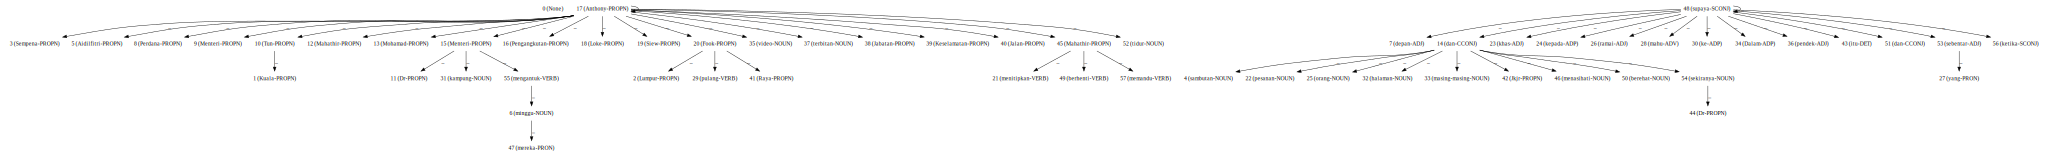

In [13]:
d_object.to_graphvis()

## Voting stack model

In [14]:
entity_network = malaya.pos.crf()
bahdanau = malaya.pos.deep_model('bahdanau')
luong = malaya.pos.deep_model('luong')
malaya.stack.voting_stack([luong, bahdanau, crf, entity_network], string)

[('Kuala', 'PROPN'),
 ('Lumpur', 'PROPN'),
 ('Sempena', 'SCONJ'),
 ('sambutan', 'NOUN'),
 ('Aidilfitri', 'PROPN'),
 ('minggu', 'NOUN'),
 ('depan', 'ADJ'),
 ('Perdana', 'PROPN'),
 ('Menteri', 'PROPN'),
 ('Tun', 'PROPN'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('Mohamad', 'PROPN'),
 ('dan', 'CCONJ'),
 ('Menteri', 'PROPN'),
 ('Pengangkutan', 'PROPN'),
 ('Anthony', 'PROPN'),
 ('Loke', 'PROPN'),
 ('Siew', 'PROPN'),
 ('Fook', 'PROPN'),
 ('menitipkan', 'VERB'),
 ('pesanan', 'NOUN'),
 ('khas', 'ADJ'),
 ('kepada', 'ADP'),
 ('orang', 'NOUN'),
 ('ramai', 'ADJ'),
 ('yang', 'PRON'),
 ('mahu', 'ADV'),
 ('pulang', 'VERB'),
 ('ke', 'ADP'),
 ('kampung', 'NOUN'),
 ('halaman', 'NOUN'),
 ('masing-masing', 'NOUN'),
 ('Dalam', 'ADP'),
 ('video', 'NOUN'),
 ('pendek', 'ADJ'),
 ('terbitan', 'NOUN'),
 ('Jabatan', 'PROPN'),
 ('Keselamatan', 'PROPN'),
 ('Jalan', 'PROPN'),
 ('Raya', 'PROPN'),
 ('Jkjr', 'PROPN'),
 ('itu', 'DET'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('menasihati', 'VERB'),
 ('mereka', 'PR